In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


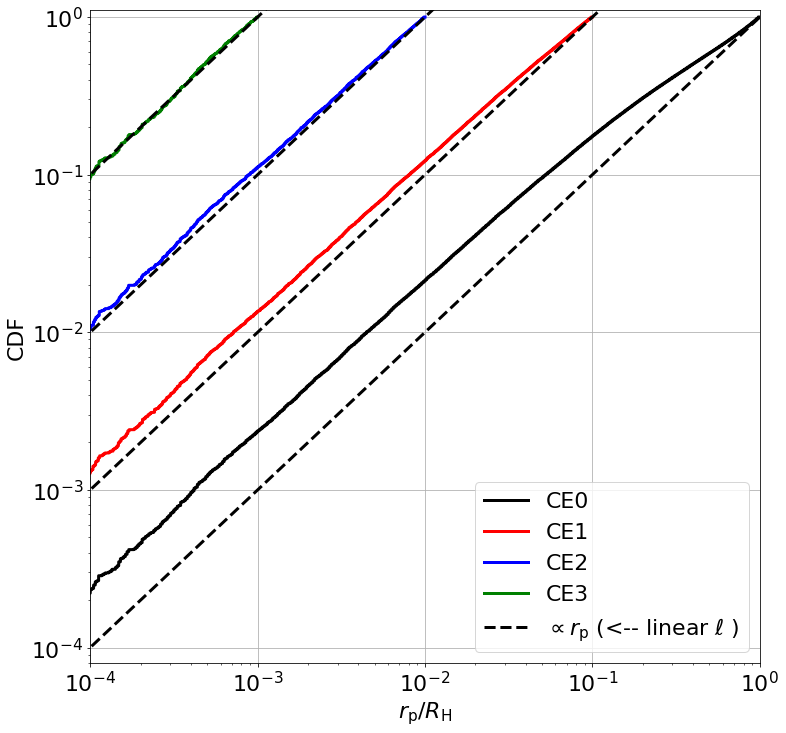

In [10]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3.)**(1./3.)

can_CE0 = np.load('d:/_work/BBH-data_use/_data/can_CE0-2000.npy')
can_CE1 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-1), : ]
can_CE2 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-2), : ]
can_CE3 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-3), : ]
can_CE4 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-4), : ]
can_CE5 = can_CE0[ (can_CE0[:,3]*(1-can_CE0[:,4])<RH*1e-5), : ]




##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([1e-4,1e-0])
axs.set_ylim([0.8e-4,1.1])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-9,1.0,1001)
aluse = .5
lw = 3



# plot the distribution of rp

eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
cnt, edges = np.histogram(eta, bins=bin_use,weights=eta*0+1./Nuse)
axs.step(edges[1:],cnt.cumsum(),linewidth=lw,label=r'CE0',c='k')

#cnt, edges = np.histogram(can_CE0[:,8] / RH, bins=bin_use,weights=eta*0+1./Nuse)
#axs.step(edges[edges>0.1],cnt.cumsum()[(edges>0.1)[1:]],linewidth=lw,label=r'CE0 (%5d events)'%Nuse,c='k')

eta = can_CE1[:,3] * (1-can_CE1[:,4]) / RH
Nuse = len(eta)
bin_use = 10**np.linspace(-9,-1,1001)
cnt, edges = np.histogram(eta, bins=bin_use,weights=eta*0+1./Nuse)
axs.step(edges[1:],cnt.cumsum(),linewidth=lw,label=r'CE1',c='r')

eta = can_CE2[:,3] * (1-can_CE2[:,4]) / RH
Nuse = len(eta)
bin_use = 10**np.linspace(-9,-2,1001)
cnt, edges = np.histogram(eta, bins=bin_use,weights=eta*0+1./Nuse)
axs.step(edges[1:],cnt.cumsum(),linewidth=lw,label=r'CE2',c='b')

eta = can_CE3[:,3] * (1-can_CE3[:,4]) / RH
Nuse = len(eta)
bin_use = 10**np.linspace(-9,-3,1001)
cnt, edges = np.histogram(eta, bins=bin_use,weights=eta*0+1./Nuse)
axs.step(edges[1:],cnt.cumsum(),linewidth=lw,label=r'CE3',c='g')

# plot the analytical distribution

bin_use = 10**np.linspace(-9,0,1001)

x1 = bin_use
Nx1 = x1
Nx1 = Nx1/np.interp(1.,x1,Nx1)
#axs.plot(x1, Nx1,'g',alpha=0.3, linewidth=20,label=r'$\propto r_{\rm p}$ (<-- linear $\ell$ )')
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw,label=r'$\propto r_{\rm p}$ (<-- linear $\ell$ )')

Nx1 = Nx1/np.interp(0.1,x1,Nx1)
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw)

Nx1 = Nx1/np.interp(0.01,x1,Nx1)
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw)

Nx1 = Nx1/np.interp(0.001,x1,Nx1)
axs.plot(x1, Nx1,'k--',alpha=1., linewidth=lw)



##  Save the figure
axs.legend(loc=4)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp.png',bbox_inches='tight',transparent=True)
